<a href="https://colab.research.google.com/github/DaipayanHDS/hds5210-2023/blob/main/final/GOOD%20HEALTH%20AND%20IMPORTANCE%20OF%20FITNESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GOOD HEALTH AND IMPORTANCE OF FITNESS

In contemporary healthcare, there is a growing appreciation for fitness programs tailored to the elderly population, notably exemplified by initiatives like 'SilverSneakers' and 'Renew Active.' These programs, designed to provide affordable or no-cost access to fitness facilities, have garnered significant acclaim among older individuals. Notably, while original Medicare plans may not encompass such fitness benefits, several Medicare Advantage plans, offered by diverse insurers, have swiftly stepped in to bridge this gap, recognizing the inherent value of promoting proactive health management in the elderly demographic.
https://glenninsurance.com/which-health-insurance-companies-pay-for-a-gym-membership/

The United States faces a considerable challenge in combating the high prevalence of obesity, which serves as a precursor to various health issues. While fitness accessibility remains relatively straightforward for younger and middle-aged demographics, the motivation to adopt a healthier lifestyle is inherently subjective. The repercussions of obesity are profound, contributing to a spectrum of health complications such as cardiovascular diseases and diabetes.

This project seeks to delve into the trends of obesity across different demographics, juxtaposed against specific health indicators. By undertaking a comprehensive analysis, we aim to identify the imperative for enhanced fitness initiatives, particularly in the context of mitigating the escalating health risks associated with obesity.

The aforementioned insights underscore the critical need to investigate and address the health disparities prevalent in society, emphasizing the importance of fitness programs as a proactive measure against the burgeoning health challenges faced by the aging population.

##### IMPORTING ALL REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
import os
import plotly.express as px
import warnings

##### USER DEFINED FUNCTION : DROP ROW IF MULTIPLE COLUMNS ARE HAVING NA VALUES


In [2]:
def drop_rows(df, columns):
  """
  This is a user defined function which will used to drop rows depending upon null values in specific columns.
  This function is going to take a dataframe and list of columns, and is going to return the modified dataframe with dropped rows.
  (dataframe, list) -> dataframe
  """
  mask = df[columns].isnull().all(axis=1)
  df_filtered = df[~mask].copy()
  return df_filtered

##### USER DEFINED FUNCTIONS : REPLACE COLUMN VALUES WHEN EXISTING VALUE IS (EQUAL) TO THE CONDITION VALUE

In [3]:
def replace_values(df, column, exist_val, repl_val):
  """
  This is another user defined function which will be used to replace set of values with another set of user defined values in a column.
  This function is going to recieve dataframe, existing values and values to be replaced, along with a specific column name where this is going to be performed.
  (dataframe, str, list, list) -> dataframe

  """
  conditions = []
  for e_val in exist_val:
    conditions.append(df[column] == e_val) #Conditions are made with single possibility == (Equality Operator)
  df[column] = np.select(conditions, repl_val, default='N/A') #If existing value does not align with the comparison then by default 'N/A' will be placed

##### USER DEFINED FUNCTIONS : REPLACE COLUMN VALUES WHEN EXISTING VALUE IS (IN THE RANGE) OF THE CONDITION VALUE

In [4]:
def replace_range(df, column_f, column_r, exist_val, repl_val):
  """
  This fuction can be used to replace (a range of values) with another set of user defined values in a column.
  This function is going to recieve dataframe, existing values and values to be replaced. This function is also going to recieve two column names,
  through which function will be allowed to make changes to another column depending upon data in previous column.
  It will be also possible to create a distinct column as per need.
  (dataframe, str,str list, list) -> dataframe

  Special instruction to use this function : length of exist_val list has to be 1 less than repl_val list.
  For example if we have a column consisting range of value 0-50 and we require that to be replaced with '<=10','<=20','<=30','<=40' and '<=50'.
  Then the exist_val will be [10,20,30,40] and repl_val will be ['<=10','<=20','<=30','<=40','<=50'], which means len(exist_val) will be 4 and
  len(repl_val) will be 5.
  The reason for this is that this fucntion will use the last value of repl_val as default value (using POP function), therefore length of both
  list will be same afterwards.
  """
  conditions = []
  for e_val in exist_val:
    conditions.append(df[column_f] <= e_val)
  last_val = repl_val.pop() #Removing the last item
  df[column_r] = np.select(conditions, repl_val, default=last_val) #Placing the last item of the repl_val list as default value

##### READING FILE : DEMOGRAPHICS (FILE TYPE : XPT, URL: https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_DEMO.XPT)

Down below, we have collected demographics data of NHANES (National Health and Nutrition Examination Survey) from CDC. This data corresponds to the year 2017 to 2020 (Pre-pandemic). We had to use this data due to unavailbility of recent data.

In [5]:
demograph_df = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_DEMO.XPT')
#To increase the usability and better handling of the file, we are going to slice the dataset to few columns only.
"""
'SEQN' : Unique identifier
RIAGENDR : Gender (Numeric)
RIDAGEYR : Age in years at the time of interview (Numeric)
RIDRETH3 : Race-ethnicity variable (Numeric)
DMDBORN4 : Country of birth (Numeric)
INDFMPIR : Ratio of family income to poverty (Numeric)
"""
demograph_df = demograph_df[['SEQN','RIAGENDR','RIDAGEYR','RIDRETH3','DMDBORN4','INDFMPIR']]

#####Transformation (Database : Demographics)

In [6]:
#Replacing numeric values of 'RIAGENDR' column to Male or Female, using 'replace_values' user defined function.
replace_values(demograph_df,'RIAGENDR',demograph_df['RIAGENDR'].unique(),['Male','Female'])

In [7]:
demograph_df['RIDRETH3'].value_counts() #Lets observe the trend of the Race-Ethnicity variable

3.0    5271
4.0    4098
1.0    1990
6.0    1638
2.0    1544
7.0    1019
Name: RIDRETH3, dtype: int64

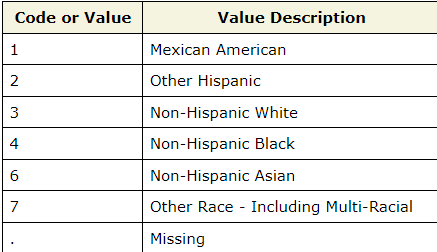

Observation: Since this variable has been numerically coded, as we can see, we can replace them with genuine descriptions to aid in understanding.
(Collected from https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_DEMO.htm)

In [8]:
#Using user defined function "replace_values" to replace numbers with proper description.
replace_values(demograph_df,'RIDRETH3',demograph_df['RIDRETH3'].unique(),['Non-Hispanic White','Non-Hispanic Black','Mexican American','Non-Hispanic Asian','Other Hispanic','Other Race'])

In [9]:
#Verifying the trend of values in the column
demograph_df['DMDBORN4'].value_counts()

1.0     12525
2.0      3028
77.0        6
99.0        1
Name: DMDBORN4, dtype: int64

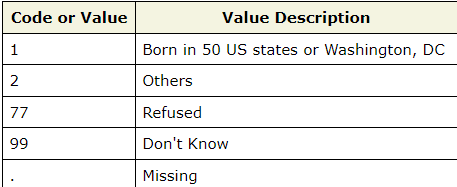

Collected from https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_DEMO.htm

In [10]:
#Similarly, using user defined function "replace_values" to replace numbers with proper description.
replace_values(demograph_df,'DMDBORN4',demograph_df['DMDBORN4'].unique(),['Born in US','Others','Refused','Dont Know'])

##### Modified demographics dataframe : (Further to be used)

In [11]:
#Lets observe modified dataframe after making changes
demograph_df.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,INDFMPIR
0,109263.0,Male,2.0,Non-Hispanic White,Born in US,4.66
1,109264.0,Female,13.0,Non-Hispanic Black,Born in US,0.83
2,109265.0,Male,2.0,Mexican American,Born in US,3.06
3,109266.0,Female,29.0,Non-Hispanic White,Others,5.00
4,109267.0,Female,21.0,Non-Hispanic Asian,Others,5.00


##### READING FILE : INSULIN READINGS (FILE TYPE : XPT, URL: https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_INS.XPT)

Each survey respondent's insulin readings from the lab are included in this dataset. We will use the Snowflake Connector to retrieve the same dataset from the Snowflake Database in accordance with the need.

In [12]:
#Installing snowflake connector package and importing snowflake connector from the package
!pip install -q "snowflake-connector-python[pandas]"
import snowflake.connector

I have already created a config file which has credentials of snowflake account, and uploaded to the google colab directly. Below code is going to open that file and save those credentials as environmental parameters.

In [13]:
#Fetching config file, which contains the snowflake connection parameters
with open('config.env', 'r') as file:
    for line in file:
        key, value = line.strip().split('=') #As the format of the config file is in this format, SNOWFLAKE_USER=username, thus we are splitting that in key, value pair
        os.environ[key] = value              #Using the key, value pair, we are setting the environment variables

##### Connecting to the database:

In [14]:
#Creating a connection variable named 'con', which will be used to fetch the required dataset
import snowflake.connector
con = snowflake.connector.connect(
    user=os.environ.get('SNOWFLAKE_USER'),
    password=os.environ.get('SNOWFLAKE_PASSWORD'),
    account=os.environ.get('SNOWFLAKE_ACCOUNT'),
    database=os.environ.get('SNOWFLAKE_DATABASE'),
    schema=os.environ.get('SNOWFLAKE_SCHEMA'))

##### Pulling the table from database using SQL query

In [15]:
#Using snowflake, fetching the dataset related to insulin which was collected from this link https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_INS.XPT:
insulin_df = con.cursor().execute('''SELECT * FROM INSULIN_NHANES''').fetch_pandas_all()

#####Transformation (Dataset : Insulin)

In [16]:
insulin_df.head() #Verifying the recieved dataset

,SEQN,WTSAFPRP,LBXIN,LBDINSI,LBDINLC
0,109264,27533.1745593967,6.0,36.0,0.0
1,109271,18100.9653186276,17.0,102.0,0.0
2,109274,16281.7583270995,14.0,81.0,0.0
3,109277,32230.0462090256,6.0,39.0,0.0
4,109282,79007.1007867567,7.0,45.0,0.0


In [17]:
#Performing slicing to the dataset to desired columns only.
"""
SEQN : Unique identifier
LBXIN : Insulin reading (μU/mL)
LBDINLC : Insulin comment code
"""
insulin_df = insulin_df[['SEQN','LBXIN','LBDINLC']]

We can see from the attached paper (https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_INS.htm) that a small number of test samples were unable to be analyzed for a variety of reasons. As a result, we can use a filter to get only legitimate values.


In [18]:
insulin_df['LBDINLC'].value_counts()

0.0    4618
1.0       7
Name: LBDINLC, dtype: int64

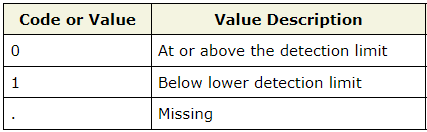

The number of successful measurements and the number of readings that could not be obtained because of an invalid sample or other issues are explained by the **LBDINLC **insulin comment code. As a result, we may design a filter to extract only accurate measurements.


In [19]:
comment_filter = (insulin_df['LBDINLC'] == 1) #Filter which represents invalid measurements
insulin_df = insulin_df[~comment_filter]      #Using Not operator to select inverse of the filter group

In [20]:
del insulin_df['LBDINLC'] #As we have obtained the valid readings, we no longer need the 'LBDINLC' column. So we can delete it.

In [21]:
insulin_df.head() #Verifying the resultant dataframe

,SEQN,LBXIN
0,109264,6.0
1,109271,17.0
2,109274,14.0
3,109277,6.0
4,109282,7.0


In [22]:
#Dropping null rows using user defined fucntion
insulin_df = drop_rows(insulin_df,['LBXIN'])

Let's first look at the dataset's value trends before moving on with it.


In [23]:
#Using plotly library to get an interactive graph of 'LBXIN' column.
fig = px.box(insulin_df, x='LBXIN', points="all")
fig.show()

As we can see, there are certain unusually high numbers (outliers), which are highly improbable and may indicate that our observation was flawed. Consequently, we'll disregard any numbers more than 300.


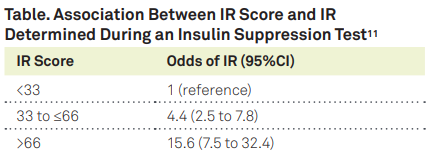

**A table collected from following link, describes the probability of developing insulin resistance.**
https://www.questdiagnostics.com/content/dam/corporate/unrestricted/documents/other/cardio_iq_insulin_resistance_panel_with_score/Cardio_IQ_Insulin_Resistance_Panel_with_Score.pdf

In [24]:
#Here, we using the repalce_range function, are creating another column which will display the status.
replace_range(insulin_df,'LBXIN','INSRES',[20,33],['Normal','Low odds','High Odds'])

In [25]:
#Dropping rows with null values using user defined function
insulin = drop_rows(insulin_df,['LBXIN'])

In [26]:
#Dropping 'LBXIN' column as it is no longer neccessary for our analysis
del insulin_df['LBXIN']

##### Modified Insulin measurement dataframe : (Further to be used)

In [27]:
insulin_df.head() #Verifying the result

,SEQN,INSRES
0,109264,Normal
1,109271,Normal
2,109274,Normal
3,109277,Normal
4,109282,Normal


#####READING FILE : BLOOD PRESSURE MEASUREMENT (FILE TYPE : XPT, URL: https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_BPXO.XPT)

All examined participants' blood pressure measurements, taken in the mobile examination center (MEC) and performed by NHANES, are included in this dataset.


Since XPT files are the most common file type, I will convert this one to a CSV file and then read it as a dataframe to show how to access numerous source file types.


In [28]:
#Reading the file from the destination as a dataframe and writing it as a csv file.
bp_pulse_df = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_BPXO.XPT')
bp_pulse_df.to_csv('P_BPXO.csv')

In [29]:
#Reading the csv file from the local google colab directory
bp_pulse_df = pd.read_csv('P_BPXO.csv')

#####Transformation (Dataset : Blood Pressure)

In [30]:
bp_pulse_df.head() #Verifying the dataset schema

,Unnamed: 0,SEQN,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3
0,0,109264.0,b'R',3.0,109.0,67.0,109.0,68.0,106.0,66.0,94.0,95.0,91.0
1,1,109266.0,b'R',4.0,99.0,56.0,99.0,55.0,99.0,52.0,68.0,66.0,66.0
2,2,109270.0,b'R',3.0,123.0,73.0,124.0,77.0,127.0,70.0,95.0,98.0,93.0
3,3,109271.0,b'R',4.0,102.0,65.0,108.0,68.0,111.0,68.0,73.0,71.0,70.0
4,4,109273.0,b'R',3.0,116.0,68.0,110.0,66.0,115.0,68.0,71.0,70.0,70.0


This dataset comprises three primary readings that were obtained three times.
1. BPXOSY: The systolic blood pressure, which can be expressed as BPXOSY1, BPXOSY2, and BPXOSY3.
2. Blood pressure diastolic index (BPXODI): This measurement is separated into three parts (BPXODI1, BPXODI2, BPXODI3).
3. BPXOPLS: Reading of the pulse (BPXOPLS1, BPXOPLS2, BPXOPLS3)

In order to handle the data more effectively, we may therefore find the average of these numbers.


In [31]:
bp_pulse_df['BPXOSY'] = round(bp_pulse_df[['BPXOSY1', 'BPXOSY2', 'BPXOSY3']].mean(axis=1),1) #Calculating average for Systolic blood pressure readings
bp_pulse_df['BPXODI'] = round(bp_pulse_df[['BPXODI1', 'BPXODI2', 'BPXODI3']].mean(axis=1),1) #Calculating average for Diastolic  blood pressure readings
bp_pulse_df['BPXOPLS'] = round(bp_pulse_df[['BPXOPLS1', 'BPXOPLS2', 'BPXOPLS3']].mean(axis=1),1) #Calculating average for pulse readings

In [32]:
#Slicing the 'bp_pulse_df' dataframe and renaming it as 'bp_pulse_mod'. This datafrane contains average values of readings along with unique identifiers.
bp_pulse_mod = bp_pulse_df[['SEQN','BPXOSY','BPXODI','BPXOPLS']]

In [33]:
bp_pulse_mod.shape #Verifying the shape of the dataframe

(11656, 4)

Since it's likely that this dataset has some null rows as well, we may utilize the user-defined method once more to get rid of them.


In [34]:
bp_pulse_mod = drop_rows(bp_pulse_mod,['BPXOSY','BPXODI','BPXOPLS']) #Dropping rows if all columns hold NaN values

In [35]:
bp_pulse_mod.shape #Shape of the dataframe after dropping

(10353, 4)

Observation : From this shape, We can observe that few rows were deleted by the function.

In [36]:
bp_pulse_mod.head() #Displaying the head of the dataframe

,SEQN,BPXOSY,BPXODI,BPXOPLS
0,109264.0,108.0,67.0,93.3
1,109266.0,99.0,54.3,66.7
2,109270.0,124.7,73.3,95.3
3,109271.0,107.0,67.0,71.3
4,109273.0,113.7,67.3,70.3


Observation: Three columns with a wide range of values are included in this dataset. We are aware that different blood pressure values correspond to different statuses. Thus, generic status can be used to replace these variables.

In [37]:
"""
For systolic blood pressure, following values and ranges can be accepted. Therefore, we will use these values on user defined fucntion
'replace_range'.
Normal: Below 120 mm Hg
Elevated: 120-129 mm Hg
Hypertension Stage 1: 130-139 mm Hg
Hypertension Stage 2: 140 mm Hg or higher
Hypertensive Crisis: 180 mm Hg or higher
"""
replace_range(bp_pulse_mod,'BPXOSY','BPXOSY',[120,129,139,179],
 ['Normal','Elevated','Hypertension Stage 1','Hypertension Stage 2','Hypertensive Crisis'])

In [38]:
"""
Similarly for Diastolic blood pressure, following values and ranges can be accepted. Therefore, we will use these values on user defined
fucntion 'replace_range'.
Normal: Below 80 mm Hg
Elevated: 80-89 mm Hg
Hypertension Stage 1: 90-99 mm Hg
Hypertension Stage 2: 100 mm Hg or higher
Hypertensive Crisis: 120 mm Hg or higher
"""
replace_range(bp_pulse_mod,'BPXODI','BPXODI',[80,89,99,119],['Normal','Elevated','Hypertension Stage 1','Hypertension Stage 2','Hypertensive Crisis'])

In [39]:
"""
This can also be done to pulse readings in the dataset using the same function following the below instruction.
Normal: 60-100 beats per minute (bpm)
Bradycardia (slow heart rate): Less than 60 bpm
Tachycardia (fast heart rate): More than 100 bpm
"""
replace_range(bp_pulse_mod,'BPXOPLS','BPXOPLS',[59,100],['Low Pulse', 'Normal', 'High Pulse'])

##### Modified Blood pressure measurement dataframe : (Further to be used)

In [40]:
bp_pulse_mod.head() #Verifying the changes in the dataframe

,SEQN,BPXOSY,BPXODI,BPXOPLS
0,109264.0,Normal,Normal,Normal
1,109266.0,Normal,Normal,Normal
2,109270.0,Elevated,Normal,Normal
3,109271.0,Normal,Normal,Normal
4,109273.0,Normal,Normal,Normal


#####READING FILE : BODY MEASUREMENT (FILE TYPE : XPT, URL: https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_BMX.XPT)

In [41]:
body_m_df = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_BMX.XPT')

#####Transformation (Dataset : Body Measurements)

Slicing the dataframe to only include the necessary columns, which include a unique identification, the children's or young participants' health status, and their BMI measurement values.


In [42]:
#Taking unique identifier (SEQN), BMI values (BMXBMI) and BMI category flag (BMDBMIC)
body_m_df = body_m_df[['SEQN','BMXBMI','BMDBMIC']]

In [43]:
body_m_df.head()

,SEQN,BMXBMI,BMDBMIC
0,109263.0,NaN,NaN
1,109264.0,17.6,2.0
2,109265.0,15.0,2.0
3,109266.0,37.8,NaN
4,109269.0,NaN,NaN


Observation: It is possible to verify that a small number of rows are empty in all columns. We can therefore remove those rows. Since there isn't a specific built-in function for that, we will drop those rows using the user-defined function that was previously mentioned.

In [44]:
#Using user defined function "drop_rows" to keep only rows which has atleast one value in one of the selected column
body_m_df = drop_rows(body_m_df, body_m_df.columns[1:])

In [45]:
body_m_df.head() #Reviewing the result

,SEQN,BMXBMI,BMDBMIC
1,109264.0,17.6,2.0
2,109265.0,15.0,2.0
3,109266.0,37.8,NaN
5,109270.0,30.9,4.0
6,109271.0,29.7,NaN


**Lets learn about the columns, BMXBMI is quite self explanatory which is the BMI (Body Mass Index) of the individual. But to learn about BMDBMIC, we can direct our attention to documentation provided by CDC NHANES.** (https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_BMX.htm)

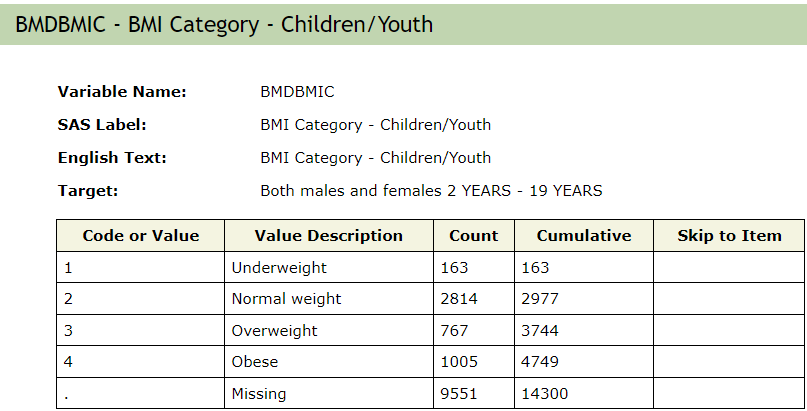

In [46]:
#Lets verify the information from the dataset.
body_m_df['BMDBMIC'].unique()

array([ 2., nan,  4.,  3.,  1.])

In [47]:
#As numbers can bring some confusion to our analysis, so we can use the user defined function to replace those values to specific values.
replace_values(body_m_df,'BMDBMIC',body_m_df['BMDBMIC'].unique(),['Normal weight','Missing','Obese','Overweight','Underweight'])

In [48]:
body_m_df.head() #Review the changes

,SEQN,BMXBMI,BMDBMIC
1,109264.0,17.6,Normal weight
2,109265.0,15.0,Normal weight
3,109266.0,37.8,N/A
5,109270.0,30.9,Obese
6,109271.0,29.7,N/A


Observation: A small number of N/A values in this dataframe indicate adult participants. To ascertain and confirm it, we can therefore combine this data with demographic data.


In [49]:
#Merging body measurement dataframe with demographics dataframe, we are performing inner join to only obtain the rows is common between both dataframes.
body_m_demo = body_m_df.merge(demograph_df,on='SEQN')

**This is the merged dataframe of body measurements dataframe (body_m_df) and demographics dataframe (demograph_df) :**

In [50]:
body_m_demo.head()

,SEQN,BMXBMI,BMDBMIC,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,INDFMPIR
0,109264.0,17.6,Normal weight,Female,13.0,Non-Hispanic Black,Born in US,0.83
1,109265.0,15.0,Normal weight,Male,2.0,Mexican American,Born in US,3.06
2,109266.0,37.8,N/A,Female,29.0,Non-Hispanic White,Others,5.00
3,109270.0,30.9,Obese,Female,11.0,Other Hispanic,Born in US,1.88
4,109271.0,29.7,N/A,Male,49.0,Mexican American,Born in US,NaN


We can eliminate entries under the age of 12, as it is considered too young to make any kind of observation from this standpoint.


In [51]:
body_m_demo=body_m_demo[~(body_m_demo['RIDAGEYR'] <= 12)] #Selecting the inverse of the filter of age <= 10

In [52]:
body_m_demo.shape

(9980, 8)

It is evident that although the 'Body Measurement' dataset already has a field for indicating health status based on BMI, it is limited to 'Children/Youth'. As a result, we must substitute the appropriate status for "N/A."


In [53]:
#Creating a filter, which will only select the rows with 'N/A' values in 'BMDBMIC' column.
bmi_filter = body_m_demo['BMDBMIC'] == 'N/A'
#Creating a subset of the dataframe with the selected rows
body_m_NA = body_m_demo[bmi_filter]

In [54]:
"""
By following below range, we can use our predefined 'replace_range' function to do the same.
Underweight: BMI less than 18.5
Normal weight: BMI 18.5 to 24.9
Overweight: BMI 25 to 29.9
Obese: BMI 30 or greater
"""
replace_range(body_m_NA,'BMXBMI','BMDBMIC',[18.5,24.9,29.9],['Underweight','Normal weight','Overweight','Obese'])

<ipython-input-4-0371735c2fc8>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We can now choose the inverse dataframe with the same filter, and by doing so, we can combine it with the 'body_m_NA' dataframe to obtain the entire dataframe with the updated values.


In [55]:
body_m_demo = pd.concat([body_m_demo[~bmi_filter], body_m_NA], ignore_index=True)

In [56]:
body_m_demo.head()

,SEQN,BMXBMI,BMDBMIC,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,INDFMPIR
0,109264.0,17.6,Normal weight,Female,13.0,Non-Hispanic Black,Born in US,0.83
1,109279.0,21.0,Normal weight,Female,17.0,Mexican American,Born in US,1.19
2,109285.0,40.7,Obese,Male,16.0,Other Hispanic,Born in US,2.39
3,109303.0,17.9,Underweight,Male,18.0,Non-Hispanic White,Others,1.03
4,109321.0,33.2,Obese,Female,19.0,Other Hispanic,Born in US,0.06


Since 'BMXBMI' is no longer needed, we can slice the dataframe to include the necessary columns.


In [57]:
del body_m_demo['BMXBMI'] #Deleting the BMXBMI column

Observation: It is now possible to verify that, like in earlier datasets, the age column contains a range of values, making it counterproductive to use it for additional research. As a result, we are able to categorize them together in a much wider sense. For this, we'll employ the same user-defined function (replace_range).

In [58]:
"""
Here, we are dividing the age range into three different group, which are Teen -> 13-17, Lower-Adult -> 18-35, Upper-Adult -> 36-60, Old -> 60+ and up
"""
replace_range(body_m_demo,'RIDAGEYR','RIDAGEYR',[17,35,49,60],['13-17','18-35','36-49','50-60','60+'])

##### Merged dataframe : Demographics and Body Measurement (Further to be used)

In [59]:
body_m_demo.head() #Displaying the result

,SEQN,BMDBMIC,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,INDFMPIR
0,109264.0,Normal weight,Female,13-17,Non-Hispanic Black,Born in US,0.83
1,109279.0,Normal weight,Female,13-17,Mexican American,Born in US,1.19
2,109285.0,Obese,Male,13-17,Other Hispanic,Born in US,2.39
3,109303.0,Underweight,Male,18-35,Non-Hispanic White,Others,1.03
4,109321.0,Obese,Female,18-35,Other Hispanic,Born in US,0.06


##### **Merged dataframe : Demographics + Body Measurement + Blood Pressure + Insulin Readings**

The converted datasets (Demographics, Body Measurement, Blood Pressure, and Insulin Readings) can now be combined into a single, comprehensive dataframe.

In [60]:
#This dataframe will contain all dataframes into one, first we are merging 'body_m_demo' dataframe with 'bp_pulse_mod' and then we are merging that with 'insulin_df'
merged_survey = body_m_demo.merge(bp_pulse_mod,on='SEQN').merge(insulin_df, on='SEQN')

In [61]:
merged_survey.head() #Verifying the dataframe

,SEQN,BMDBMIC,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,INDFMPIR,BPXOSY,BPXODI,BPXOPLS,INSRES
0,109264.0,Normal weight,Female,13-17,Non-Hispanic Black,Born in US,0.83,Normal,Normal,Normal,Normal
1,109380.0,Obese,Male,13-17,Non-Hispanic Black,Born in US,2.25,Normal,Normal,Normal,High Odds
2,109398.0,Normal weight,Female,13-17,Non-Hispanic White,Born in US,NaN,Normal,Normal,Normal,Normal
3,109399.0,Normal weight,Female,13-17,Mexican American,Born in US,0.76,Normal,Normal,Normal,Normal
4,109465.0,Normal weight,Male,13-17,Mexican American,Born in US,0.28,Normal,Normal,Normal,Normal


In [62]:
merged_survey.shape

(4065, 11)

#####READING FILE : Hospital Utilization & Access to Care (FILE TYPE : XPT, URL: https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_HUQ.XPT)

The final dataset, which pertains to participants' use of Access to Care, can be found at https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&Cycle=2017-2020.
This dataset is crucial to our research because it will tell us how these individuals view their health and how frequently they have to visit the hospital, which affects how often they use their health insurance.


In [63]:
A_to_C = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_HUQ.XPT')

#####Transformation (Dataset : Hospital Utilization and Access to Care)

In [64]:
A_to_C.head()

,SEQN,HUQ010,HUQ030,HUQ051,HUD062,HUQ071,HUQ090
0,109263.0,1.0,1.0,1.000000e+00,NaN,2.0,NaN
1,109264.0,2.0,1.0,5.397605e-79,2.0,2.0,1.0
2,109265.0,1.0,1.0,2.000000e+00,NaN,2.0,NaN
3,109266.0,3.0,1.0,1.000000e+00,NaN,2.0,2.0
4,109267.0,1.0,2.0,1.000000e+00,NaN,2.0,2.0


For our analysis, we only require SEQN, HUQ010, HUQ051, HUD062 columns only, therefore we can slice the original dataset. Following are the description of those columns.

1.   SEQN : Unique Identifier
2.   HUQ010 : General health condition
3.   HUQ051 - Number of times receive healthcare over past year
4.   HUD062 - How long since last healthcare visit





In [65]:
#Slicing the dataframe
A_to_C = A_to_C[['SEQN', 'HUQ010', 'HUQ051', 'HUD062']]

We can also observe that 'HUQ051' holds some unusual numeric values, therefore we can modify those with round function.

In [66]:
A_to_C['HUQ051'] = A_to_C['HUQ051'].round(10)

In [67]:
A_to_C.head()

,SEQN,HUQ010,HUQ051,HUD062
0,109263.0,1.0,1.0,NaN
1,109264.0,2.0,0.0,2.0
2,109265.0,1.0,2.0,NaN
3,109266.0,3.0,1.0,NaN
4,109267.0,1.0,1.0,NaN


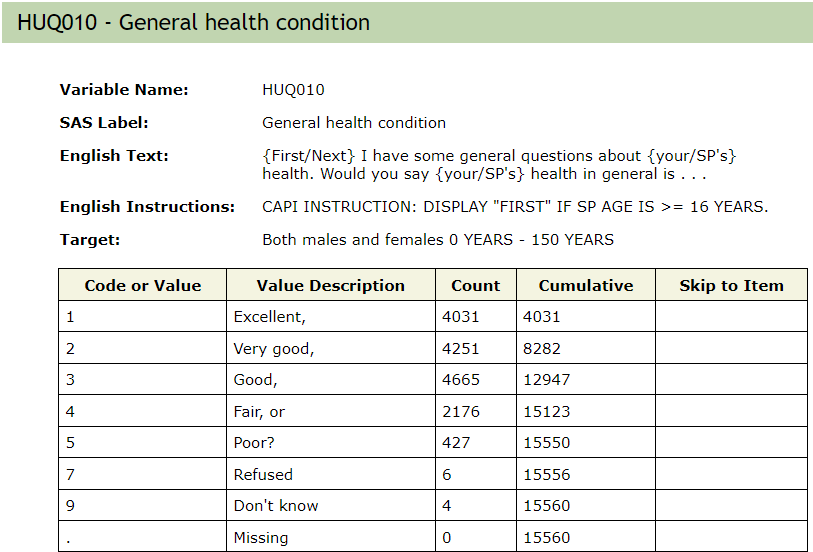

Similar to previous steps, we can replace numerical status values to actual description for better understanding. Above information is taken from (https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_HUQ.htm).

In [68]:
#Using the 'replace_values' function, we will be replacing those values as such.
replace_values(A_to_C,'HUQ010',[1,2,3,4,5],['Excelent','Very good','Good','Fair','Poor'])

In [69]:
#As other status values are not neccessary and have been replaced as 'N/A' therefore, let us drop those rows
A_to_C= A_to_C[~(A_to_C['HUQ010']=='N/A')]

Similar to the above transformation, we can do the same for other columns as stated in (https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_HUQ.htm)

In [70]:
#Transformation for HUQ051 column
replace_values(A_to_C,'HUQ051',[0,1,2,3,4,5,6,7,8],['0','1','2-3','4-5','6-7','8-9','10-12','13-15','16+'])
A_to_C= A_to_C[~(A_to_C['HUQ051']=='N/A')]

In [71]:
#Transformation for HUD062 column
replace_values(A_to_C,'HUD062',[0,1,2,3,4],['Never','In last year','Last two year', 'Within 5 years', 'More than 5 years'])

<ipython-input-3-c73f272e70b8>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#####Modified Hospital Utilization dataframe : (Further to be used)

In [72]:
A_to_C.head()

,SEQN,HUQ010,HUQ051,HUD062
0,109263.0,Excelent,1,N/A
1,109264.0,Very good,0,Last two year
2,109265.0,Excelent,2-3,N/A
3,109266.0,Good,1,N/A
4,109267.0,Excelent,1,N/A


##### **Final Merged dataframe:**

Now, let us merge this dataframe with 'merged_survey' dataframe.

In [73]:
merged_survey = merged_survey.merge(A_to_C,on='SEQN')

In [74]:
merged_survey.head()

,SEQN,BMDBMIC,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,INDFMPIR,BPXOSY,BPXODI,BPXOPLS,INSRES,HUQ010,HUQ051,HUD062
0,109264.0,Normal weight,Female,13-17,Non-Hispanic Black,Born in US,0.83,Normal,Normal,Normal,Normal,Very good,0,Last two year
1,109380.0,Obese,Male,13-17,Non-Hispanic Black,Born in US,2.25,Normal,Normal,Normal,High Odds,Fair,1,N/A
2,109398.0,Normal weight,Female,13-17,Non-Hispanic White,Born in US,NaN,Normal,Normal,Normal,Normal,Very good,1,N/A
3,109399.0,Normal weight,Female,13-17,Mexican American,Born in US,0.76,Normal,Normal,Normal,Normal,Good,2-3,N/A
4,109465.0,Normal weight,Male,13-17,Mexican American,Born in US,0.28,Normal,Normal,Normal,Normal,Good,2-3,N/A


#####**Final Transformations**

We will then compare the healthy and unhealthy individuals. First, we'll create a filter using the findings of a laboratory examination (measurements of insulin and blood pressure).

In [75]:
#This filter only selects 'Normal' status in BPXOSY, BPXODI, BPXOPLS, INSRES these four columns.
healthy_filter = (merged_survey['BPXOSY'] == 'Normal') & (merged_survey['BPXODI'] == 'Normal') & (merged_survey['BPXOPLS'] == 'Normal') & (merged_survey['INSRES'] == 'Normal')

**Healthy Participants: This dataframe only consists of people whose Blood pressure and insulin levels were 'Normal'**

In [76]:
healthy_people = merged_survey[healthy_filter]
healthy_people.reset_index(drop=True,inplace=True)
healthy_people.head()

,SEQN,BMDBMIC,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,INDFMPIR,BPXOSY,BPXODI,BPXOPLS,INSRES,HUQ010,HUQ051,HUD062
0,109264.0,Normal weight,Female,13-17,Non-Hispanic Black,Born in US,0.83,Normal,Normal,Normal,Normal,Very good,0,Last two year
1,109398.0,Normal weight,Female,13-17,Non-Hispanic White,Born in US,NaN,Normal,Normal,Normal,Normal,Very good,1,N/A
2,109399.0,Normal weight,Female,13-17,Mexican American,Born in US,0.76,Normal,Normal,Normal,Normal,Good,2-3,N/A
3,109465.0,Normal weight,Male,13-17,Mexican American,Born in US,0.28,Normal,Normal,Normal,Normal,Good,2-3,N/A
4,109511.0,Overweight,Male,13-17,Other Hispanic,Born in US,1.24,Normal,Normal,Normal,Normal,Excelent,1,N/A


**Unhealthy Participants: This dataframe only consists of people whose Blood pressure or insulin levels were out of ordinary('Normal')**

In [77]:
unhealthy_people = merged_survey[~healthy_filter]
unhealthy_people.reset_index(drop=True,inplace=True)
unhealthy_people.head()

,SEQN,BMDBMIC,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,INDFMPIR,BPXOSY,BPXODI,BPXOPLS,INSRES,HUQ010,HUQ051,HUD062
0,109380.0,Obese,Male,13-17,Non-Hispanic Black,Born in US,2.25,Normal,Normal,Normal,High Odds,Fair,1,N/A
1,109471.0,Normal weight,Male,13-17,Non-Hispanic Asian,Born in US,2.60,Elevated,Normal,Normal,Normal,Excelent,1,N/A
2,109542.0,Obese,Female,18-35,Non-Hispanic Black,Born in US,1.41,Normal,Normal,Low Pulse,Normal,Good,2-3,N/A
3,109589.0,Obese,Female,13-17,Other Hispanic,Born in US,2.20,Normal,Normal,Normal,High Odds,Good,2-3,N/A
4,109632.0,Normal weight,Male,13-17,Mexican American,Born in US,1.81,Elevated,Normal,Low Pulse,Normal,Very good,1,N/A


#####**Visualization and Conclusion:**

Plotting the healthcare utilization factor (HUQ051) and BMI status (BMDBMIC). To see if there are any differences in the numbers, we will produce two visualizations for healthy and unwell individuals.


In [78]:
#Creating a pivot table from 'healthy_people' dataframe with HUQ051, BMDBMIC columns
healthy_atoc = healthy_people.pivot_table(index='HUQ051', columns=['BMDBMIC'], values='SEQN', aggfunc='count', fill_value=0)

In [79]:
#Using Altair to plot a interactive visualization
healthy_atoc_reset = healthy_atoc.reset_index()
melted_df = pd.melt(healthy_atoc_reset, id_vars=['HUQ051'], var_name='Group', value_name='Count')
chart = alt.Chart(melted_df).mark_circle().encode(x='HUQ051:O', y='Count:Q', color='Group:N', tooltip=['HUQ051', 'Count', 'Group']).properties(width=600, height=400).interactive()
lines = alt.Chart(melted_df).mark_line().encode(x='HUQ051:O',y='Count:Q',color='Group:N')
chart+lines

alt.LayerChart(...)

In [80]:
#Creating a pivot table from 'unhealthy_people' dataframe with HUQ051, BMDBMIC columns
unhealthy_atoc = unhealthy_people.pivot_table(index='HUQ051', columns=['BMDBMIC'], values='SEQN', aggfunc='count', fill_value=0)

In [81]:
#Using Altair to plot a interactive visualization
unhealthy_atoc_reset = unhealthy_atoc.reset_index()
melted_df = pd.melt(unhealthy_atoc_reset, id_vars=['HUQ051'], var_name='Group', value_name='Count')
chart = alt.Chart(melted_df).mark_circle().encode(x='HUQ051:O', y='Count:Q', color='Group:N', tooltip=['HUQ051', 'Count', 'Group']).properties(width=600, height=400).interactive()
lines = alt.Chart(melted_df).mark_line().encode(x='HUQ051:O',y='Count:Q',color='Group:N')
chart+lines

alt.LayerChart(...)

**Conclusion 1.** We can see that the number of unhealthy people seeking medical attention increased, particularly those who were overweight. It is evident from both graphs that those in the overweight and obese categories were more likely to have access to care.


Let's attempt to use BMI status (BMDBMIC), age (RIDAGEYR), and race (RIDRETH3) demographic data, together with plot visualization for each factor.

**FACTOR : RACE**

In [82]:
#Creating a pivot table from 'healthy_people' dataframe with HUQ051, RIDRETH3 columns
healthy_race = healthy_people.pivot_table(index='BMDBMIC', columns=['RIDRETH3'], values='SEQN', aggfunc='count', fill_value=0)

In [83]:
#Renaming the column names of the pivot table
healthy_race.columns = ['Mexican American', 'Non-Hispanic Asian', 'Non-Hispanic Black',
       'Non-Hispanic White', 'Other Hispanic', 'Multi Race']

In [84]:
#Transforming counts to percent
healthy_race = round(healthy_race.div(healthy_race.sum(axis=0), axis=1) * 100,1)

In [85]:
healthy_race #Displaying the resultant pivot table

,Mexican American,Non-Hispanic Asian,Non-Hispanic Black,Non-Hispanic White,Other Hispanic,Multi Race
BMDBMIC,,,,,,
Normal weight,42.6,34.5,35.1,53.2,35.3,39.0
Obese,25.4,31.7,29.8,6.4,38.2,35.4
Overweight,29.6,31.7,33.9,36.3,23.2,23.2
Underweight,2.5,2.2,1.2,4.1,3.3,2.4


In [86]:
#Using Altair to display the visualization
healthy_race_reset = healthy_race.reset_index()
melted_df = pd.melt(healthy_race_reset, id_vars=['BMDBMIC'], var_name='Group', value_name='Percent')
chart = alt.Chart(melted_df).mark_circle().encode(x='BMDBMIC:O', y='Percent:Q', color='Group:N', tooltip=['BMDBMIC', 'Percent', 'Group']).properties(width=600, height=400).interactive()
lines = alt.Chart(melted_df).mark_line().encode(x='BMDBMIC:O',y='Percent:Q',color='Group:N')
chart + lines

alt.LayerChart(...)

In [87]:
#Creating a pivot table from 'healthy_people' dataframe with HUQ051, RIDRETH3 columns
unhealthy_race = unhealthy_people.pivot_table(index='BMDBMIC', columns=['RIDRETH3'], values='SEQN', aggfunc='count', fill_value=0)

In [88]:
#Renaming the column names of the pivot table
unhealthy_race.columns = ['Mexican American', 'Non-Hispanic Asian', 'Non-Hispanic Black',
       'Non-Hispanic White', 'Other Hispanic', 'Multi Race']

In [89]:
#Transforming counts to percent
unhealthy_race = round(unhealthy_race.div(unhealthy_race.sum(axis=0), axis=1) * 100,1)

In [90]:
#Using Altair to display the visualization
unhealthy_race_reset = unhealthy_race.reset_index()
melted_df = pd.melt(unhealthy_race_reset, id_vars=['BMDBMIC'], var_name='Group', value_name='Percent')
chart = alt.Chart(melted_df).mark_circle().encode(x='BMDBMIC:O', y='Percent:Q', color='Group:N', tooltip=['BMDBMIC', 'Percent', 'Group']).properties(width=600, height=400).interactive()
lines = alt.Chart(melted_df).mark_line().encode(x='BMDBMIC:O',y='Percent:Q',color='Group:N')
chart + lines

alt.LayerChart(...)

**Conclusion 2.** We can see from this visualization that 'Non-Hispanic White' individuals have a lower likelihood of being overweight. It is clear by looking at the 'unhealthy_people' section that there are more overweight and obese individuals there, and vice versa, indicating that their poor health is a direct cause of it.

**FACTOR : AGE**

In [91]:
#Creating a pivot table from 'healthy_people' dataframe with HUQ051, RIDRETH3 columns
healthy_age = healthy_people.pivot_table(index='BMDBMIC', columns=['RIDAGEYR'], values='SEQN', aggfunc='count', fill_value=0)

In [92]:
healthy_age = round(healthy_age.div(healthy_age.sum(axis=0), axis=1) * 100,1)

In [93]:
#Using Altair to display the visualization
healthy_age_reset = healthy_age.reset_index()
melted_df = pd.melt(healthy_age_reset, id_vars=['BMDBMIC'], var_name='Group', value_name='Percent')
chart = alt.Chart(melted_df).mark_circle().encode(x='BMDBMIC:O', y='Percent:Q', color='Group:N', tooltip=['BMDBMIC', 'Percent', 'Group']).properties(width=600, height=400).interactive()
lines = alt.Chart(melted_df).mark_line().encode(x='BMDBMIC:O',y='Percent:Q',color='Group:N')
chart + lines

alt.LayerChart(...)

In [94]:
#Creating a pivot table from 'unhealthy_people' dataframe with HUQ051, RIDRETH3 columns
unhealthy_age = unhealthy_people.pivot_table(index='BMDBMIC', columns=['RIDAGEYR'], values='SEQN', aggfunc='count', fill_value=0)

In [95]:
unhealthy_age = round(unhealthy_age.div(unhealthy_age.sum(axis=0), axis=1) * 100,1)

In [96]:
#Using Altair to display the visualization
unhealthy_age_reset = unhealthy_age.reset_index()
melted_df = pd.melt(unhealthy_age_reset, id_vars=['BMDBMIC'], var_name='Group', value_name='Percent')
chart = alt.Chart(melted_df).mark_circle().encode(x='BMDBMIC:O', y='Percent:Q', color='Group:N', tooltip=['BMDBMIC', 'Percent', 'Group']).properties(width=600, height=400).interactive()
lines = alt.Chart(melted_df).mark_line().encode(x='BMDBMIC:O',y='Percent:Q',color='Group:N')
chart + lines

alt.LayerChart(...)

Conclusion 3. We can plainly see from these two graphs that the lines representing the healthiest individuals are highly distorted. We can verify that, even among those over 60, the proportion of overweight or obese individuals is lower than that of middle-aged individuals. This can be a simple sign that, despite expectations, middle-aged individuals do not always have improved health, and there may be a direct link between their healthy behaviors and their actual state of health.


Both insurance firms and healthcare providers can benefit greatly from this extensive dataframe's insights and business ideas. It is well known that insurance companies stand to profit more from a decline in hospital utilization.
